## Installation du cache

In [ ]:
pip install diskcache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os
import zipfile

# Chemin vers le fichier ZIP
zip_file_path = '/content/cache_dir_backup.zip'

# Vérification de l'existence du fichier ZIP
if os.path.exists(zip_file_path):
    print(f"Le fichier {zip_file_path} existe. Décompression en cours...")

    # Décompression du fichier ZIP
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/cache_dir')
    print("Décompression terminée. Le cache est chargé dans /content/cache_dir.")
else:
    print(f"Le fichier {zip_file_path} n'existe pas. Aucune action de décompression effectuée.")


Le fichier /content/cache_dir_backup.zip n'existe pas. Aucune action de décompression effectuée.


## Choix des catégories de journaux

In [ ]:
#categories_to_keep = [
#        "Acoustics and Ultrasonics", "Applied Mathematics", "Artificial Intelligence",
#        "Bioengineering", "Biomedical Engineering", "Computational Mathematics",
#        "Computational Mechanics", "Computational Theory and Mathematics",
#        "Computer Graphics and Computer-Aided Design", "Computer Science Applications",
#        "Computer Science (miscellaneous)", "Computer Vision and Pattern Recognition",
#        "Control and Optimization", "Control and Systems Engineering",
#        "Decision Sciences (miscellaneous)", "Electrical and Electronic Engineering",
#        "Engineering (miscellaneous)", "Hardware and Architecture",
#        "Health Informatics", "Instrumentation", "Mathematical Physics",
#        "Mechanical Engineering", "Modeling and Simulation", "Numerical Analysis",
#        "Signal Processing", "Software", "Statistical and Nonlinear Physics",
#        "Theoretical Computer Science", "Multidisciplinary"
#    ]

categories_to_keep = [
        "Acoustics and Ultrasonics", "Biomedical Engineering",
        "Health Informatics"
    ]

## Lister les journaux par catégorie

In [ ]:
import csv
import re

# Le HTML fourni
html = """
<li><a href='j.php' data-code='0'> All subject categories</a></li><li><a href='j.php?c=1402' data-code='1402'>Accounting</a></li><li><a href='j.php?c=3102' data-code='3102'>Acoustics and Ultrasonics</a></li><li><a href='j.php?c=2902' data-code='2902'>Advanced and Specialized Nursing</a></li><li><a href='j.php?c=2202' data-code='2202'>Aerospace Engineering</a></li><li><a href='j.php?c=1302' data-code='1302'>Aging</a></li><li><a href='j.php?c=1101' data-code='1101'>Agricultural and Biological Sciences (miscellaneous)</a></li><li><a href='j.php?c=1102' data-code='1102'>Agronomy and Crop Science</a></li><li><a href='j.php?c=2602' data-code='2602'>Algebra and Number Theory</a></li><li><a href='j.php?c=2603' data-code='2603'>Analysis</a></li><li><a href='j.php?c=1602' data-code='1602'>Analytical Chemistry</a></li><li><a href='j.php?c=2702' data-code='2702'>Anatomy</a></li><li><a href='j.php?c=2703' data-code='2703'>Anesthesiology and Pain Medicine</a></li><li><a href='j.php?c=1103' data-code='1103'>Animal Science and Zoology</a></li><li><a href='j.php?c=3314' data-code='3314'>Anthropology</a></li><li><a href='j.php?c=2604' data-code='2604'>Applied Mathematics</a></li><li><a href='j.php?c=2402' data-code='2402'>Applied Microbiology and Biotechnology</a></li><li><a href='j.php?c=3202' data-code='3202'>Applied Psychology</a></li><li><a href='j.php?c=1104' data-code='1104'>Aquatic Science</a></li><li><a href='j.php?c=3302' data-code='3302'>Archeology</a></li><li><a href='j.php?c=1204' data-code='1204'>Archeology (arts and humanities)</a></li><li><a href='j.php?c=2216' data-code='2216'>Architecture</a></li><li><a href='j.php?c=1702' data-code='1702'>Artificial Intelligence</a></li><li><a href='j.php?c=1201' data-code='1201'>Arts and Humanities (miscellaneous)</a></li><li><a href='j.php?c=2903' data-code='2903'>Assessment and Diagnosis</a></li><li><a href='j.php?c=3103' data-code='3103'>Astronomy and Astrophysics</a></li><li><a href='j.php?c=1902' data-code='1902'>Atmospheric Science</a></li><li><a href='j.php?c=3107' data-code='3107'>Atomic and Molecular Physics, and Optics</a></li><li><a href='j.php?c=2203' data-code='2203'>Automotive Engineering</a></li><li><a href='j.php?c=2802' data-code='2802'>Behavioral Neuroscience</a></li><li><a href='j.php?c=1303' data-code='1303'>Biochemistry</a></li><li><a href='j.php?c=1301' data-code='1301'>Biochemistry, Genetics and Molecular Biology (miscellaneous)</a></li><li><a href='j.php?c=2704' data-code='2704'>Biochemistry (medical)</a></li><li><a href='j.php?c=1502' data-code='1502'>Bioengineering</a></li><li><a href='j.php?c=2803' data-code='2803'>Biological Psychiatry</a></li><li><a href='j.php?c=2502' data-code='2502'>Biomaterials</a></li><li><a href='j.php?c=2204' data-code='2204'>Biomedical Engineering</a></li><li><a href='j.php?c=1304' data-code='1304'>Biophysics</a></li><li><a href='j.php?c=1305' data-code='1305'>Biotechnology</a></li><li><a href='j.php?c=2215' data-code='2215'>Building and Construction</a></li><li><a href='j.php?c=1403' data-code='1403'>Business and International Management</a></li><li><a href='j.php?c=1401' data-code='1401'>Business, Management and Accounting (miscellaneous)</a></li><li><a href='j.php?c=1306' data-code='1306'>Cancer Research</a></li><li><a href='j.php?c=2705' data-code='2705'>Cardiology and Cardiovascular Medicine</a></li><li><a href='j.php?c=2904' data-code='2904'>Care Planning</a></li><li><a href='j.php?c=1503' data-code='1503'>Catalysis</a></li><li><a href='j.php?c=1307' data-code='1307'>Cell Biology</a></li><li><a href='j.php?c=2804' data-code='2804'>Cellular and Molecular Neuroscience</a></li><li><a href='j.php?c=2503' data-code='2503'>Ceramics and Composites</a></li><li><a href='j.php?c=1501' data-code='1501'>Chemical Engineering (miscellaneous)</a></li><li><a href='j.php?c=1504' data-code='1504'>Chemical Health and Safety</a></li><li><a href='j.php?c=1601' data-code='1601'>Chemistry (miscellaneous)</a></li><li><a href='j.php?c=3602' data-code='3602'>Chiropractics</a></li><li><a href='j.php?c=2205' data-code='2205'>Civil and Structural Engineering</a></li><li><a href='j.php?c=1205' data-code='1205'>Classics</a></li><li><a href='j.php?c=1308' data-code='1308'>Clinical Biochemistry</a></li><li><a href='j.php?c=3203' data-code='3203'>Clinical Psychology</a></li><li><a href='j.php?c=2805' data-code='2805'>Cognitive Neuroscience</a></li><li><a href='j.php?c=1505' data-code='1505'>Colloid and Surface Chemistry</a></li><li><a href='j.php?c=3315' data-code='3315'>Communication</a></li><li><a href='j.php?c=2905' data-code='2905'>Community and Home Care</a></li><li><a href='j.php?c=2707' data-code='2707'>Complementary and Alternative Medicine</a></li><li><a href='j.php?c=3603' data-code='3603'>Complementary and Manual Therapy</a></li><li><a href='j.php?c=2605' data-code='2605'>Computational Mathematics</a></li><li><a href='j.php?c=2206' data-code='2206'>Computational Mechanics</a></li><li><a href='j.php?c=1703' data-code='1703'>Computational Theory and Mathematics</a></li><li><a href='j.php?c=1704' data-code='1704'>Computer Graphics and Computer-Aided Design</a></li><li><a href='j.php?c=1705' data-code='1705'>Computer Networks and Communications</a></li><li><a href='j.php?c=1706' data-code='1706'>Computer Science Applications</a></li><li><a href='j.php?c=1701' data-code='1701'>Computer Science (miscellaneous)</a></li><li><a href='j.php?c=1707' data-code='1707'>Computer Vision and Pattern Recognition</a></li><li><a href='j.php?c=1903' data-code='1903'>Computers in Earth Sciences</a></li><li><a href='j.php?c=3104' data-code='3104'>Condensed Matter Physics</a></li><li><a href='j.php?c=1206' data-code='1206'>Conservation</a></li><li><a href='j.php?c=2606' data-code='2606'>Control and Optimization</a></li><li><a href='j.php?c=2207' data-code='2207'>Control and Systems Engineering</a></li><li><a href='j.php?c=2706' data-code='2706'>Critical Care and Intensive Care Medicine</a></li><li><a href='j.php?c=2906' data-code='2906'>Critical Care Nursing</a></li><li><a href='j.php?c=3316' data-code='3316'>Cultural Studies</a></li><li><a href='j.php?c=1801' data-code='1801'>Decision Sciences (miscellaneous)</a></li><li><a href='j.php?c=3317' data-code='3317'>Demography</a></li><li><a href='j.php?c=3502' data-code='3502'>Dental Assisting</a></li><li><a href='j.php?c=3503' data-code='3503'>Dental Hygiene</a></li><li><a href='j.php?c=3501' data-code='3501'>Dentistry (miscellaneous)</a></li><li><a href='j.php?c=2708' data-code='2708'>Dermatology</a></li><li><a href='j.php?c=3303' data-code='3303'>Development</a></li><li><a href='j.php?c=3204' data-code='3204'>Developmental and Educational Psychology</a></li><li><a href='j.php?c=1309' data-code='1309'>Developmental Biology</a></li><li><a href='j.php?c=2806' data-code='2806'>Developmental Neuroscience</a></li><li><a href='j.php?c=2607' data-code='2607'>Discrete Mathematics and Combinatorics</a></li><li><a href='j.php?c=3002' data-code='3002'>Drug Discovery</a></li><li><a href='j.php?c=2709' data-code='2709'>Drug Guides</a></li><li><a href='j.php?c=1901' data-code='1901'>Earth and Planetary Sciences (miscellaneous)</a></li><li><a href='j.php?c=1904' data-code='1904'>Earth-Surface Processes</a></li><li><a href='j.php?c=2302' data-code='2302'>Ecological Modeling</a></li><li><a href='j.php?c=2303' data-code='2303'>Ecology</a></li><li><a href='j.php?c=1105' data-code='1105'>Ecology, Evolution, Behavior and Systematics</a></li><li><a href='j.php?c=1905' data-code='1905'>Economic Geology</a></li><li><a href='j.php?c=2002' data-code='2002'>Economics and Econometrics</a></li><li><a href='j.php?c=2001' data-code='2001'>Economics, Econometrics and Finance (miscellaneous)</a></li><li><a href='j.php?c=3304' data-code='3304'>Education</a></li><li><a href='j.php?c=3399' data-code='3399'>E-learning</a></li><li><a href='j.php?c=2208' data-code='2208'>Electrical and Electronic Engineering</a></li><li><a href='j.php?c=1603' data-code='1603'>Electrochemistry</a></li><li><a href='j.php?c=2504' data-code='2504'>Electronic, Optical and Magnetic Materials</a></li><li><a href='j.php?c=2710' data-code='2710'>Embryology</a></li><li><a href='j.php?c=3604' data-code='3604'>Emergency Medical Services</a></li><li><a href='j.php?c=2711' data-code='2711'>Emergency Medicine</a></li><li><a href='j.php?c=2907' data-code='2907'>Emergency Nursing</a></li><li><a href='j.php?c=2807' data-code='2807'>Endocrine and Autonomic Systems</a></li><li><a href='j.php?c=1310' data-code='1310'>Endocrinology</a></li><li><a href='j.php?c=2712' data-code='2712'>Endocrinology, Diabetes and Metabolism</a></li><li><a href='j.php?c=2102' data-code='2102'>Energy Engineering and Power Technology</a></li><li><a href='j.php?c=2101' data-code='2101'>Energy (miscellaneous)</a></li><li><a href='j.php?c=2201' data-code='2201'>Engineering (miscellaneous)</a></li><li><a href='j.php?c=2304' data-code='2304'>Environmental Chemistry</a></li><li><a href='j.php?c=2305' data-code='2305'>Environmental Engineering</a></li><li><a href='j.php?c=2301' data-code='2301'>Environmental Science (miscellaneous)</a></li><li><a href='j.php?c=2713' data-code='2713'>Epidemiology</a></li><li><a href='j.php?c=3402' data-code='3402'>Equine</a></li><li><a href='j.php?c=3205' data-code='3205'>Experimental and Cognitive Psychology</a></li><li><a href='j.php?c=2714' data-code='2714'>Family Practice</a></li><li><a href='j.php?c=1506' data-code='1506'>Filtration and Separation</a></li><li><a href='j.php?c=2003' data-code='2003'>Finance</a></li><li><a href='j.php?c=1507' data-code='1507'>Fluid Flow and Transfer Processes</a></li><li><a href='j.php?c=3403' data-code='3403'>Food Animals</a></li><li><a href='j.php?c=1106' data-code='1106'>Food Science</a></li><li><a href='j.php?c=1107' data-code='1107'>Forestry</a></li><li><a href='j.php?c=2103' data-code='2103'>Fuel Technology</a></li><li><a href='j.php?c=2908' data-code='2908'>Fundamentals and Skills</a></li><li><a href='j.php?c=2715' data-code='2715'>Gastroenterology</a></li><li><a href='j.php?c=3318' data-code='3318'>Gender Studies</a></li><li><a href='j.php?c=1311' data-code='1311'>Genetics</a></li><li><a href='j.php?c=2716' data-code='2716'>Genetics (clinical)</a></li><li><a href='j.php?c=1906' data-code='1906'>Geochemistry and Petrology</a></li><li><a href='j.php?c=3305' data-code='3305'>Geography, Planning and Development</a></li><li><a href='j.php?c=1907' data-code='1907'>Geology</a></li><li><a href='j.php?c=2608' data-code='2608'>Geometry and Topology</a></li><li><a href='j.php?c=1908' data-code='1908'>Geophysics</a></li><li><a href='j.php?c=1909' data-code='1909'>Geotechnical Engineering and Engineering Geology</a></li><li><a href='j.php?c=2717' data-code='2717'>Geriatrics and Gerontology</a></li><li><a href='j.php?c=2909' data-code='2909'>Gerontology</a></li><li><a href='j.php?c=2306' data-code='2306'>Global and Planetary Change</a></li><li><a href='j.php?c=1708' data-code='1708'>Hardware and Architecture</a></li><li><a href='j.php?c=2718' data-code='2718'>Health Informatics</a></li><li><a href='j.php?c=3605' data-code='3605'>Health Information Management</a></li><li><a href='j.php?c=2719' data-code='2719'>Health Policy</a></li><li><a href='j.php?c=3601' data-code='3601'>Health Professions (miscellaneous)</a></li><li><a href='j.php?c=3306' data-code='3306'>Health (social science)</a></li><li><a href='j.php?c=2307' data-code='2307'>Health, Toxicology and Mutagenesis</a></li><li><a href='j.php?c=2720' data-code='2720'>Hematology</a></li><li><a href='j.php?c=2721' data-code='2721'>Hepatology</a></li><li><a href='j.php?c=2722' data-code='2722'>Histology</a></li><li><a href='j.php?c=1202' data-code='1202'>History</a></li><li><a href='j.php?c=1207' data-code='1207'>History and Philosophy of Science</a></li><li><a href='j.php?c=1108' data-code='1108'>Horticulture</a></li><li><a href='j.php?c=3307' data-code='3307'>Human Factors and Ergonomics</a></li><li><a href='j.php?c=1709' data-code='1709'>Human-Computer Interaction</a></li><li><a href='j.php?c=2403' data-code='2403'>Immunology</a></li><li><a href='j.php?c=2723' data-code='2723'>Immunology and Allergy</a></li><li><a href='j.php?c=2401' data-code='2401'>Immunology and Microbiology (miscellaneous) </a></li><li><a href='j.php?c=2209' data-code='2209'>Industrial and Manufacturing Engineering</a></li><li><a href='j.php?c=1410' data-code='1410'>Industrial Relations</a></li><li><a href='j.php?c=2725' data-code='2725'>Infectious Diseases</a></li><li><a href='j.php?c=1710' data-code='1710'>Information Systems</a></li><li><a href='j.php?c=1802' data-code='1802'>Information Systems and Management</a></li><li><a href='j.php?c=1604' data-code='1604'>Inorganic Chemistry</a></li><li><a href='j.php?c=1109' data-code='1109'>Insect Science</a></li><li><a href='j.php?c=3105' data-code='3105'>Instrumentation</a></li><li><a href='j.php?c=2724' data-code='2724'>Internal Medicine</a></li><li><a href='j.php?c=2910' data-code='2910'>Issues, Ethics and Legal Aspects</a></li><li><a href='j.php?c=3308' data-code='3308'>Law</a></li><li><a href='j.php?c=2911' data-code='2911'>Leadership and Management</a></li><li><a href='j.php?c=3309' data-code='3309'>Library and Information Sciences</a></li><li><a href='j.php?c=3319' data-code='3319'>Life-span and Life-course Studies</a></li><li><a href='j.php?c=3310' data-code='3310'>Linguistics and Language</a></li><li><a href='j.php?c=1208' data-code='1208'>Literature and Literary Theory</a></li><li><a href='j.php?c=2609' data-code='2609'>Logic</a></li><li><a href='j.php?c=2912' data-code='2912'>LPN and LVN</a></li><li><a href='j.php?c=1404' data-code='1404'>Management Information Systems</a></li><li><a href='j.php?c=2308' data-code='2308'>Management, Monitoring, Policy and Law</a></li><li><a href='j.php?c=1405' data-code='1405'>Management of Technology and Innovation</a></li><li><a href='j.php?c=1803' data-code='1803'>Management Science and Operations Research</a></li><li><a href='j.php?c=1406' data-code='1406'>Marketing</a></li><li><a href='j.php?c=2505' data-code='2505'>Materials Chemistry</a></li><li><a href='j.php?c=2501' data-code='2501'>Materials Science (miscellaneous)</a></li><li><a href='j.php?c=2913' data-code='2913'>Maternity and Midwifery</a></li><li><a href='j.php?c=2610' data-code='2610'>Mathematical Physics</a></li><li><a href='j.php?c=2601' data-code='2601'>Mathematics (miscellaneous)</a></li><li><a href='j.php?c=2210' data-code='2210'>Mechanical Engineering</a></li><li><a href='j.php?c=2211' data-code='2211'>Mechanics of Materials</a></li><li><a href='j.php?c=2214' data-code='2214'>Media Technology</a></li><li><a href='j.php?c=2914' data-code='2914'>Medical and Surgical Nursing</a></li><li><a href='j.php?c=3606' data-code='3606'>Medical Assisting and Transcription</a></li><li><a href='j.php?c=3607' data-code='3607'>Medical Laboratory Technology</a></li><li><a href='j.php?c=3608' data-code='3608'>Medical Terminology</a></li><li><a href='j.php?c=2701' data-code='2701'>Medicine (miscellaneous)</a></li><li><a href='j.php?c=2506' data-code='2506'>Metals and Alloys</a></li><li><a href='j.php?c=2404' data-code='2404'>Microbiology</a></li><li><a href='j.php?c=2726' data-code='2726'>Microbiology (medical)</a></li><li><a href='j.php?c=2611' data-code='2611'>Modeling and Simulation</a></li><li><a href='j.php?c=1312' data-code='1312'>Molecular Biology</a></li><li><a href='j.php?c=1313' data-code='1313'>Molecular Medicine</a></li><li><a href='j.php?c=1000' data-code='1000'>Multidisciplinary</a></li><li><a href='j.php?c=1209' data-code='1209'>Museology</a></li><li><a href='j.php?c=1210' data-code='1210'>Music</a></li><li><a href='j.php?c=2509' data-code='2509'>Nanoscience and Nanotechnology</a></li><li><a href='j.php?c=2309' data-code='2309'>Nature and Landscape Conservation</a></li><li><a href='j.php?c=2727' data-code='2727'>Nephrology</a></li><li><a href='j.php?c=2808' data-code='2808'>Neurology</a></li><li><a href='j.php?c=2728' data-code='2728'>Neurology (clinical)</a></li><li><a href='j.php?c=3206' data-code='3206'>Neuropsychology and Physiological Psychology</a></li><li><a href='j.php?c=2801' data-code='2801'>Neuroscience (miscellaneous)</a></li><li><a href='j.php?c=3106' data-code='3106'>Nuclear and High Energy Physics</a></li><li><a href='j.php?c=2104' data-code='2104'>Nuclear Energy and Engineering</a></li><li><a href='j.php?c=2612' data-code='2612'>Numerical Analysis</a></li><li><a href='j.php?c=2915' data-code='2915'>Nurse Assisting</a></li><li><a href='j.php?c=2901' data-code='2901'>Nursing (miscellaneous)</a></li><li><a href='j.php?c=2916' data-code='2916'>Nutrition and Dietetics</a></li><li><a href='j.php?c=2729' data-code='2729'>Obstetrics and Gynecology</a></li><li><a href='j.php?c=3609' data-code='3609'>Occupational Therapy</a></li><li><a href='j.php?c=2212' data-code='2212'>Ocean Engineering</a></li><li><a href='j.php?c=1910' data-code='1910'>Oceanography</a></li><li><a href='j.php?c=2730' data-code='2730'>Oncology</a></li><li><a href='j.php?c=2917' data-code='2917'>Oncology (nursing)</a></li><li><a href='j.php?c=2731' data-code='2731'>Ophthalmology</a></li><li><a href='j.php?c=3610' data-code='3610'>Optometry</a></li><li><a href='j.php?c=3504' data-code='3504'>Oral Surgery</a></li><li><a href='j.php?c=1605' data-code='1605'>Organic Chemistry</a></li><li><a href='j.php?c=1407' data-code='1407'>Organizational Behavior and Human Resource Management</a></li><li><a href='j.php?c=3505' data-code='3505'>Orthodontics</a></li><li><a href='j.php?c=2732' data-code='2732'>Orthopedics and Sports Medicine</a></li><li><a href='j.php?c=2733' data-code='2733'>Otorhinolaryngology</a></li><li><a href='j.php?c=1911' data-code='1911'>Paleontology</a></li><li><a href='j.php?c=2405' data-code='2405'>Parasitology</a></li><li><a href='j.php?c=2734' data-code='2734'>Pathology and Forensic Medicine</a></li><li><a href='j.php?c=2918' data-code='2918'>Pathophysiology</a></li><li><a href='j.php?c=2919' data-code='2919'>Pediatrics</a></li><li><a href='j.php?c=2735' data-code='2735'>Pediatrics, Perinatology and Child Health</a></li><li><a href='j.php?c=3506' data-code='3506'>Periodontics</a></li><li><a href='j.php?c=3003' data-code='3003'>Pharmaceutical Science</a></li><li><a href='j.php?c=3004' data-code='3004'>Pharmacology</a></li><li><a href='j.php?c=2736' data-code='2736'>Pharmacology (medical)</a></li><li><a href='j.php?c=2920' data-code='2920'>Pharmacology (nursing)</a></li><li><a href='j.php?c=3001' data-code='3001'>Pharmacology, Toxicology and Pharmaceutics (miscellaneous)</a></li><li><a href='j.php?c=3611' data-code='3611'>Pharmacy</a></li><li><a href='j.php?c=1211' data-code='1211'>Philosophy</a></li><li><a href='j.php?c=1606' data-code='1606'>Physical and Theoretical Chemistry</a></li><li><a href='j.php?c=3612' data-code='3612'>Physical Therapy, Sports Therapy and Rehabilitation</a></li><li><a href='j.php?c=3101' data-code='3101'>Physics and Astronomy (miscellaneous)</a></li><li><a href='j.php?c=1314' data-code='1314'>Physiology</a></li><li><a href='j.php?c=2737' data-code='2737'>Physiology (medical)</a></li><li><a href='j.php?c=1110' data-code='1110'>Plant Science</a></li><li><a href='j.php?c=3613' data-code='3613'>Podiatry</a></li><li><a href='j.php?c=3320' data-code='3320'>Political Science and International Relations</a></li><li><a href='j.php?c=2310' data-code='2310'>Pollution</a></li><li><a href='j.php?c=2507' data-code='2507'>Polymers and Plastics</a></li><li><a href='j.php?c=1508' data-code='1508'>Process Chemistry and Technology</a></li><li><a href='j.php?c=2738' data-code='2738'>Psychiatry and Mental Health</a></li><li><a href='j.php?c=3201' data-code='3201'>Psychology (miscellaneous)</a></li><li><a href='j.php?c=3321' data-code='3321'>Public Administration</a></li><li><a href='j.php?c=2739' data-code='2739'>Public Health, Environmental and Occupational Health</a></li><li><a href='j.php?c=2740' data-code='2740'>Pulmonary and Respiratory Medicine</a></li><li><a href='j.php?c=3108' data-code='3108'>Radiation</a></li><li><a href='j.php?c=3614' data-code='3614'>Radiological and Ultrasound Technology</a></li><li><a href='j.php?c=2741' data-code='2741'>Radiology, Nuclear Medicine and Imaging</a></li><li><a href='j.php?c=2742' data-code='2742'>Rehabilitation</a></li><li><a href='j.php?c=1212' data-code='1212'>Religious Studies</a></li><li><a href='j.php?c=2105' data-code='2105'>Renewable Energy, Sustainability and the Environment</a></li><li><a href='j.php?c=2743' data-code='2743'>Reproductive Medicine</a></li><li><a href='j.php?c=2922' data-code='2922'>Research and Theory</a></li><li><a href='j.php?c=3615' data-code='3615'>Respiratory Care</a></li><li><a href='j.php?c=2923' data-code='2923'>Review and Exam Preparation</a></li><li><a href='j.php?c=2744' data-code='2744'>Reviews and References (medical)</a></li><li><a href='j.php?c=2745' data-code='2745'>Rheumatology</a></li><li><a href='j.php?c=3311' data-code='3311'>Safety Research</a></li><li><a href='j.php?c=2213' data-code='2213'>Safety, Risk, Reliability and Quality</a></li><li><a href='j.php?c=2809' data-code='2809'>Sensory Systems</a></li><li><a href='j.php?c=1711' data-code='1711'>Signal Processing</a></li><li><a href='j.php?c=3404' data-code='3404'>Small Animals</a></li><li><a href='j.php?c=3207' data-code='3207'>Social Psychology</a></li><li><a href='j.php?c=3301' data-code='3301'>Social Sciences (miscellaneous)</a></li><li><a href='j.php?c=3323' data-code='3323'>Social Work</a></li><li><a href='j.php?c=3312' data-code='3312'>Sociology and Political Science</a></li><li><a href='j.php?c=1712' data-code='1712'>Software</a></li><li><a href='j.php?c=1111' data-code='1111'>Soil Science</a></li><li><a href='j.php?c=1912' data-code='1912'>Space and Planetary Science</a></li><li><a href='j.php?c=1607' data-code='1607'>Spectroscopy</a></li><li><a href='j.php?c=3616' data-code='3616'>Speech and Hearing</a></li><li><a href='j.php?c=3699' data-code='3699'>Sports Science</a></li><li><a href='j.php?c=3109' data-code='3109'>Statistical and Nonlinear Physics</a></li><li><a href='j.php?c=2613' data-code='2613'>Statistics and Probability</a></li><li><a href='j.php?c=1804' data-code='1804'>Statistics, Probability and Uncertainty</a></li><li><a href='j.php?c=1408' data-code='1408'>Strategy and Management</a></li><li><a href='j.php?c=1913' data-code='1913'>Stratigraphy</a></li><li><a href='j.php?c=1315' data-code='1315'>Structural Biology</a></li><li><a href='j.php?c=3110' data-code='3110'>Surfaces and Interfaces</a></li><li><a href='j.php?c=2508' data-code='2508'>Surfaces, Coatings and Films</a></li><li><a href='j.php?c=2746' data-code='2746'>Surgery</a></li><li><a href='j.php?c=2614' data-code='2614'>Theoretical Computer Science</a></li><li><a href='j.php?c=1409' data-code='1409'>Tourism, Leisure and Hospitality Management</a></li><li><a href='j.php?c=3005' data-code='3005'>Toxicology</a></li><li><a href='j.php?c=2747' data-code='2747'>Transplantation</a></li><li><a href='j.php?c=3313' data-code='3313'>Transportation</a></li><li><a href='j.php?c=3322' data-code='3322'>Urban Studies</a></li><li><a href='j.php?c=2748' data-code='2748'>Urology</a></li><li><a href='j.php?c=3401' data-code='3401'>Veterinary (miscellaneous)</a></li><li><a href='j.php?c=2406' data-code='2406'>Virology</a></li><li><a href='j.php?c=1213' data-code='1213'>Visual Arts and Performing Arts</a></li><li><a href='j.php?c=2311' data-code='2311'>Waste Management and Disposal</a></li><li><a href='j.php?c=2312' data-code='2312'>Water Science and Technology</a></li>
"""

# Extraction des catégories et des codes
pattern = re.compile(r"data-code='(\d+)'>([^<]+)</a>")
matches = pattern.findall(html)

# Vérification des correspondances
if matches:
    print(f"{len(matches)} catégories trouvées.")
else:
    print("Aucune catégorie trouvée.")

# Enregistrement dans un fichier CSV
csv_file = "categories.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Code", "Category"])  # En-têtes
    writer.writerows(matches)  # Données

print(f"Les catégories ont été enregistrées dans {csv_file}.")


311 catégories trouvées.
Les catégories ont été enregistrées dans categories.csv.


In [ ]:
import pandas as pd
import urllib.request
import time
import os
import csv

# Créer un dossier temporaire pour stocker les fichiers CSV téléchargés
TEMP_DIR = "temp_journals"

# Charger le fichier de catégories et filtrer les catégories à conserver
def load_categories(filename="categories.csv", categories_to_keep=None):
    if categories_to_keep is None:
        categories_to_keep = ["Multidisciplinary"]

    df = pd.read_csv(filename)
    # Filtrer les catégories qui sont dans la liste
    df_filtered = df[df['Category'].isin(categories_to_keep)]
    return df_filtered

# Fonction pour télécharger le fichier CSV en utilisant urllib
def download_csv_with_retry(category_id, temp_dir=TEMP_DIR, max_retries=3, delay=5):
    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    file_name = os.path.join(temp_dir, f"journals_{category_id}.csv")
    url = f"https://www.scimagojr.com/journalrank.php?category={category_id}&out=xls"

    for attempt in range(max_retries):
        try:
            # Télécharger le fichier
            urllib.request.urlretrieve(url, file_name)
            print(f"Fichier téléchargé avec succès : {file_name}")
            return file_name  # Retourner le nom du fichier téléchargé
        except Exception as e:
            print(f"Tentative {attempt + 1} échouée, erreur : {e}. Réessayer dans {delay} secondes.")
            time.sleep(delay)  # Attendre avant de réessayer

    print("Échec du téléchargement après plusieurs tentatives.")
    return None

# Fonction pour extraire tous les ISSN et noms de journaux d'un fichier CSV
def extract_issns_and_names(file_name):
    # Charger le fichier CSV dans un DataFrame pandas
    df = pd.read_csv(file_name, sep=';', dtype=str)  # Utilisation de ';' comme séparateur

    # Vérifier que la colonne 'Issn' et 'Title' existent
    if 'Issn' not in df.columns or 'Title' not in df.columns:
        raise ValueError(f"Les colonnes 'Issn' ou 'Title' sont introuvables dans le fichier {file_name}.")

    # Extraire la colonne 'Issn' et 'Title' et supprimer les valeurs manquantes
    issns = df['Issn'].dropna()  # Supprimer les valeurs manquantes (NaN)
    titles = df['Title'].dropna()

    # Créer une liste d'ISSN et noms de journaux
    all_issns_and_titles = []
    for issn_list, title in zip(issns, titles):
        # Ajouter chaque ISSN séparé à la liste
        for issn in issn_list.split(','):
            issn = issn.strip()
            # Exclure les ISSN invalides ou marqués "-"
            if issn and issn != '-':
                all_issns_and_titles.append((issn, title.strip()))  # Ajout de l'ISSN et du nom du journal

    return all_issns_and_titles

# Fonction principale pour récupérer les ISSN de toutes les catégories
def get_all_issns_and_titles(categories_filename="categories.csv", categories_to_keep=None):
    # Charger et filtrer les catégories
    df_filtered = load_categories(categories_filename, categories_to_keep)

    all_issns_and_titles = []

    # Télécharger les fichiers CSV et extraire les ISSN pour chaque catégorie
    for _, row in df_filtered.iterrows():
        category_id = row['Code']
        category_name = row['Category']

        # Télécharger le fichier CSV de la catégorie
        file_name = download_csv_with_retry(category_id)
        if file_name:
            # Extraire les ISSN et les titres des journaux
            try:
                issns_and_titles = extract_issns_and_names(file_name)
                all_issns_and_titles.extend(issns_and_titles)
            except Exception as e:
                print(f"Erreur lors de l'extraction des ISSN pour la catégorie {category_name}: {e}")
            finally:
                # Supprimer le fichier après extraction
                os.remove(file_name)

    # Supprimer les doublons d'ISSN dans la liste
    unique_issns_and_titles = {}
    for issn, title in all_issns_and_titles:
        # Si l'ISSN est déjà dans le dictionnaire, on ignore l'ajout
        if issn not in unique_issns_and_titles:
            unique_issns_and_titles[issn] = title

    # Convertir en liste sans doublon
    all_issns_and_titles = [(issn, title) for issn, title in unique_issns_and_titles.items()]

    return all_issns_and_titles

# Sauvegarder les ISSN et noms de journaux dans un fichier CSV
def save_issns_and_titles_to_csv(issns_and_titles, output_filename="issns_and_titles.csv"):
    with open(output_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['ISSN', 'Journal Name'])  # En-têtes
        for issn, title in issns_and_titles:
            writer.writerow([issn, title])

def load_issns_and_titles(csv_file="issns_and_titles.csv"):
    """
    Charger les ISSNs et les noms des journaux depuis un fichier CSV,
    et retirer les tirets pour un format uniforme.
    """
    df = pd.read_csv(csv_file)
    # Supprimer les tirets des ISSNs pour normalisation
    issns = df['ISSN'].dropna().apply(lambda x: x.replace('-', '')).unique()
    return set(issns)

# Exécution du processus complet
if __name__ == "__main__":

    # Obtenir tous les ISSN et titres des journaux
    issns_and_titles = get_all_issns_and_titles(categories_to_keep=categories_to_keep)

    # Sauvegarder les résultats dans un CSV
    save_issns_and_titles_to_csv(issns_and_titles)

    print(f"Le fichier des ISSN et noms de journaux a été généré avec succès.")


Fichier téléchargé avec succès : temp_journals/journals_3102.csv
Fichier téléchargé avec succès : temp_journals/journals_2204.csv
Fichier téléchargé avec succès : temp_journals/journals_2718.csv
Le fichier des ISSN et noms de journaux a été généré avec succès.


## Défintion des fonctions pour les requetes

In [ ]:
import requests
import time
import diskcache as dc
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import math

# Initialiser le cache
cache = dc.Cache('cache_dir')

def get_article_metadata(doi, min_year=None, allowed_issns=None):
    """
    Récupère les métadonnées d'un article donné à partir de l'API Crossref.
    Retourne None si l'article n'est pas dans la liste d'ISSNs autorisés.
    """
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()['message']

        # Gérer les cas où le titre est absent ou vide
        title = data.get('title', ['Unknown Title'])
        title = title[0] if title else 'Unknown Title'

        authors = [
            {
                "given": author.get("given", ""),
                "family": author.get("family", ""),
            }
            for author in data.get("author", [])
        ]

        journal = data.get('container-title', ['Unknown Journal'])[0] if data.get('container-title') else data.get('publisher', '')
        year = data.get('published-print', {}).get('date-parts', [[None]])[0][0]
        if year is None:
            return None

        # Vérification de l'année minimale
        if min_year and isinstance(year, int) and year < min_year:
            #print(f"Article rejeté (publié avant {min_year}) : {doi}")
            return None

        issns = data.get('ISSN', [])  # Liste des ISSNs associés au journal

        # Si une liste d'ISSNs autorisés est fournie, filtrer l'article
        if allowed_issns:
            normalized_issns = [issn.replace("-", "") for issn in issns]
            allowed_issns = [issn.replace("-", "") for issn in allowed_issns]
            if not any(issn in allowed_issns for issn in normalized_issns):
                #print(f"Article rejeté (journal non autorisé) : {doi}")
                return None

        return {
            "doi": doi,
            "title": title,
            "authors": authors,
            "journal": journal,
            "issns": issns,  # Ajout des ISSNs
            "year": year,
        }
    else:
        print(f"Erreur : Impossible de récupérer les données pour le DOI {doi}")
        return None


def get_related_dois(doi, direction="references"):
    """
    Récupère les articles cités ou citant un article donné via OpenCitations.
    """
    base_url = "https://opencitations.net/index/api/v1/" + ("citations/" if direction == "citations" else "references/")
    url = f"{base_url}{doi}"
    response = requests.get(url)
    if response.status_code == 200:
        return [item.get('cited', '') if direction == "references" else item.get('citing', '') for item in response.json()]
    else:
        print(f"Erreur lors de la récupération des {direction} pour le DOI {doi}: {response.status_code}")
        return []


def filter_article_by_issns(article, issns):
    """
    Vérifie si un article est publié dans un journal dont l'ISSN figure dans la liste autorisée.
    """
    article_issns = article.get("issns", [])
    if not article_issns:  # Si aucun ISSN trouvé
        return False

    normalized_issns = [issn.replace("-", "") for issn in article_issns]
    allowed_issns = [issn.replace("-", "") for issn in issns]
    return any(issn in allowed_issns for issn in normalized_issns)


def get_article_metadata_cached(doi, min_year, issns):
    """
    Récupère les métadonnées d'un article et applique un filtre par ISSNs.
    """
    if doi in cache:
        print(f"Article déjà interrogé https://doi.org/{doi}")
        return cache[doi]

    data = get_article_metadata(doi, min_year, issns)
    if data:
        if filter_article_by_issns(data, issns):  # Filtrer l'article
            print(f"Nouvel article accepté https://doi.org/{doi}")
            cache[doi] = data
            return data
        else:
            #print(f"Nouvel article rejeté {doi} (journal non autorisé)")
            return None
    return None


def get_related_dois_cached(doi, direction="references", min_year=None, issns=None):
    """
    Récupère les articles cités ou citant un article, et applique un filtre sur les ISSNs des journaux.
    """
    if issns is None:
        issns = []  # Par défaut, aucun filtre

    cache_key = f"{doi}_{direction}"
    if cache_key in cache:
        return cache[cache_key]

    related_dois = get_related_dois(doi, direction)
    filtered_dois = []

    for related_doi in related_dois:
        metadata = get_article_metadata_cached(related_doi, min_year, issns)  # Récupère les métadonnées en filtrant
        if metadata:
            filtered_dois.append(related_doi)  # Ajouter uniquement les articles valides

    cache[cache_key] = filtered_dois
    return filtered_dois


In [ ]:
def process_article(doi, depth=3, min_year=1965, allowed_issns=None):
    """
    Récupère les métadonnées et construit un graphe avec les articles liés,
    en minimisant les requêtes et en priorisant les articles cités fréquemment.
    """
    G = nx.DiGraph()
    cache = set()  # Ensemble des DOIs déjà traités pour éviter les doublons
    stack = [(doi, 0, 'both')]  # (doi, current_depth, exploration_type)

    while stack:
        print(f"Articles à traiter : {len(stack)}")
        current_doi, current_depth, exploration_type = stack.pop()

        if current_doi in cache:
            continue  # Passer si déjà traité

        # Vérifier si la profondeur maximale est atteinte
        if current_depth > depth:
            continue

        # Récupérer les métadonnées
        article_data = get_article_metadata_cached(current_doi, min_year=min_year, issns=allowed_issns)
        if not article_data:
            continue  # Passer si les métadonnées ne sont pas disponibles

        # Ajouter l'article au graphe
        G.add_node(current_doi, **{
            "title": article_data.get("title", "Unknown Title"),
            "authors": article_data.get("authors", []),
            "year": article_data.get("year", "Unknown Year"),
            "journal": article_data.get("journal", "Unknown Journal"),
        })
        cache.add(current_doi)

        # Ajouter les relations basées sur le type d'exploration
        if exploration_type in ('both', 'references'):
            # Ajouter les articles référencés
            referenced_dois = get_related_dois_cached(current_doi, direction="references", min_year=min_year, issns=allowed_issns)
            for ref_doi in referenced_dois:
                if ref_doi not in cache:
                    G.add_edge(current_doi, ref_doi)
                    stack.append((ref_doi, current_depth + 1, 'references'))

        if exploration_type in ('both', 'citations') and current_depth == 0:
            # Ajouter les articles citants uniquement pour l'article initial
            citing_dois = get_related_dois_cached(current_doi, direction="citations", min_year=min_year, issns=allowed_issns)
            for cite_doi in citing_dois:
                if cite_doi not in cache:
                    G.add_edge(cite_doi, current_doi)
                    stack.append((cite_doi, current_depth + 1, 'references'))

    return G


In [ ]:
def visualize_graph(graph, root_doi, max_generation=2, show_labels=True, min_year_graph=1990):
    """
    Affiche le graphe avec :
    - des couleurs pour chaque année de publication,
    - une réduction des nœuds et connexions pour une meilleure lisibilité,
    - des labels pour les nœuds les plus significatifs.

    Args:
    - graph: Le graphe NetworkX représentant les articles et leurs relations.
    - root_doi: DOI de l'article central, qui sera mis en évidence.
    - max_generation: Nombre de générations à inclure dans le graphe (positives et négatives).
    - show_labels: Booléen pour activer ou désactiver l'affichage des labels des nœuds.
    """
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib import colors as mcolors

    # Filtrer les nœuds ayant des métadonnées
    nodes_with_metadata = [node for node in graph.nodes if graph.nodes[node]]
    subgraph = graph.subgraph(nodes_with_metadata)  # Créer un sous-graphe

    # Vérifier si le root_doi est présent dans le sous-graphe
    if root_doi not in subgraph:
        raise ValueError(f"L'article central {root_doi} n'est pas dans les nœuds avec métadonnées.")

    # Calculer les générations relatives
    generations = {}
    for node in subgraph.nodes:
        try:
            if nx.has_path(subgraph, root_doi, node):
                generations[node] = nx.shortest_path_length(subgraph, root_doi, node)  # Génération +
            elif nx.has_path(subgraph, node, root_doi):
                generations[node] = -nx.shortest_path_length(subgraph, node, root_doi)  # Génération -
            else:
                generations[node] = float('inf')  # Pas de chemin
        except nx.NetworkXNoPath:
            generations[node] = float('inf')

    # Filtrer les nœuds hors du max_generation
    filtered_nodes = [node for node, gen in generations.items() if abs(gen) <= max_generation]
    subgraph = subgraph.subgraph(filtered_nodes)  # Réduire le graphe aux nœuds filtrés

    # Redéfinir les générations pour le sous-graphe
    generations = {node: gen for node, gen in generations.items() if node in subgraph}

    # EXTRAIT : Couleur par année de publication
    years = []
    for node in subgraph.nodes:
        year = graph.nodes[node].get('year', None)
        try:
            # Si l'année est valide (un entier), on l'ajoute
            if year and year != 'Unknown':
                years.append(int(year))  # Ajouter l'année à la liste
            else:
                years.append(min_year_graph)  # Remplacer 'Unknown' ou l'absence d'année par une valeur par défaut
        except ValueError:
            years.append(min_year_graph)  # Si l'année n'est pas un nombre valide, on l'assigne à -1

    # Normalisation de l'année pour utiliser une colormap
    min_year = min(years)
    max_year = max(years)
    norm = mcolors.Normalize(vmin=min_year, vmax=max_year)
    cmap = plt.get_cmap("viridis")  # Utiliser une colormap qui varie avec l'année

    # Colorer les nœuds par année de publication
    node_colors = []
    for node in subgraph.nodes:
        year = graph.nodes[node].get("year", None)
        try:
            # Si l'année est valide, on l'ajoute à la colormap
            year_value = int(year) if year not in ["Unknown", None] else -1
            node_colors.append(cmap(norm(year_value)))
        except ValueError:
            # Si l'année n'est pas valide, on met la couleur grise
            node_colors.append("gray")

    # Calculer les tailles des nœuds proportionnelles au degré
    degrees = dict(subgraph.degree())
    node_sizes = [50 + degrees[node] * 200 for node in subgraph.nodes]

    # Mise en évidence de l'article central (root_doi)
    root_size = 300  # Taille spéciale pour l'article central
    node_sizes = [
        root_size if node == root_doi else size
        for node, size in zip(subgraph.nodes, node_sizes)
    ]
    node_colors = [
        "gold" if node == root_doi else color
        for node, color in zip(subgraph.nodes, node_colors)
    ]

    # Créer un dictionnaire de labels : seulement pour les gros nœuds
    def get_label(data):
        first_author = "Unknown"
        year = "Unknown Year"
        if "authors" in data and data["authors"]:
            first_author = data["authors"][0].get("family", "Unknown")
        if "year" in data:
            year = data["year"]
        return f"{first_author} ({year})"

    labels = {
        node: get_label(subgraph.nodes[node]) if degrees[node] > 2 else ""
        for node in subgraph.nodes
    } if show_labels else None

    # Obtenir les positions des nœuds
    pos = nx.spring_layout(subgraph, seed=42, k=0.3)

    # Tracer le graphe
    plt.figure(figsize=(14, 10))
    nx.draw(
        subgraph,
        pos,
        with_labels=True,
        node_size=node_sizes,
        node_color=node_colors,
        edge_color="gray",
        alpha=0.7,
        font_size=10 if show_labels else 0,
        labels=labels
    )

    # Ajouter une colorbar pour les années de publication
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label("Année de publication")

    # Titre et affichage
    plt.title(f"Graphe des articles liés à {root_doi}")
    plt.show()


In [ ]:
import pickle

def save_graph(graph, output_file="graph.pkl"):
    """
    Sauvegarde un graphe NetworkX dans un fichier au format pickle.

    :param graph: Le graphe NetworkX à sauvegarder.
    :param output_file: Chemin du fichier dans lequel enregistrer le graphe.
    """
    with open(output_file, "wb") as f:
        pickle.dump(graph, f)
    print(f"Le graphe a été sauvegardé dans {output_file}")

def load_graph(input_file="graph.pkl"):
    """
    Charge un graphe NetworkX à partir d'un fichier pickle.

    :param input_file: Chemin du fichier pickle contenant le graphe.
    :return: Le graphe NetworkX chargé.
    """
    with open(input_file, "rb") as f:
        graph = pickle.load(f)
    print(f"Le graphe a été chargé depuis {input_file}")
    return graph


In [ ]:
def save_bibtex(graph, output_file="bibliography.bib"):
    """
    Enregistre les métadonnées des nœuds du graphe au format BibTeX, en incluant le nombre de connexions entrantes
    et sortantes entre les nœuds ayant des métadonnées.

    :param graph: Le graphe contenant les nœuds avec les métadonnées.
    :param output_file: Le chemin du fichier dans lequel enregistrer les entrées BibTeX.
    """
    # Filtrer les nœuds avec métadonnées
    nodes_with_metadata = [node for node in graph.nodes if graph.nodes[node]]
    subgraph = graph.subgraph(nodes_with_metadata)  # Créer un sous-graphe

    with open(output_file, 'w', encoding='utf-8') as f:
        for node in subgraph.nodes:
            try:
                data = subgraph.nodes[node]  # Accède aux métadonnées du nœud

                # Extraire les informations
                doi = node
                title = data.get("title", "Unknown Title")
                authors = data.get("authors", [])
                authors_str = " and ".join([
                    f"{a['family']}, {a['given'][0]}." if 'family' in a and 'given' in a and a['given'] else "Unknown Author"
                    for a in authors
                ]) if authors else "Unknown Author"

                year = data.get("year", "Unknown Year")
                journal = data.get("journal", "Unknown Journal")

                # Vérifier si le titre et le DOI sont valides
                if title == "Unknown Title" or not doi:
                    print(f"Article invalide : titre ou DOI manquant pour {doi}")
                    continue

                # Calculer les connexions entrantes et sortantes
                incoming_connections = subgraph.in_degree(node)
                outgoing_connections = subgraph.out_degree(node)

                # Construire l'entrée BibTeX
                entry = f"""@article{{{doi.replace('/', '_')},
                  title = {{{title}}},
                  author = {{{authors_str}}},
                  year = {{{year}}},
                  journal = {{{journal}}},
                  doi = {{{doi}}},
                  incoming = {{{incoming_connections}}},
                  outgoing = {{{outgoing_connections}}}
                }}\n"""

                # Écrire l'entrée dans le fichier
                f.write(entry)
            except Exception as e:
                # Afficher un message d'erreur et continuer avec le prochain nœud
                print(f"Erreur lors de l'écriture de l'article {node}: {e}")

    print(f"Les métadonnées avec connexions ont été enregistrées dans le fichier {output_file}")

## Choix de l'article à étudier

In [ ]:
doi = "10.1016/j.bspc.2019.101811"  # Exemple de DOI


## Choix des limites d'analyse

In [ ]:
min_year = 19
max_depth = 4

## Création de l'arbre

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Articles à traiter : 34
Articles à traiter : 33
Articles à traiter : 32
Articles à traiter : 31
Articles à traiter : 30
Articles à traiter : 29
Article déjà interrogé https://doi.org/10.1007/s10439-010-0077-4
Nouvel article accepté https://doi.org/10.1007/bf02260870
Article déjà interrogé https://doi.org/10.1007/s10439-005-4053-3
Article déjà interrogé https://doi.org/10.1007/s10439-009-9838-3
Article déjà interrogé https://doi.org/10.1007/s10439-008-9611-z
Article déjà interrogé https://doi.org/10.1007/s10439-006-9232-3
Article déjà interrogé https://doi.org/10.1007/s10439-006-9187-4
Article déjà interrogé https://doi.org/10.1016/s1350-4533(99)00066-1
Article déjà interrogé https://doi.org/10.1016/s1350-4533(99)00066-1
Nouvel article accepté https://doi.org/10.1007/bf02442748
Nouvel article accepté https://doi.org/10.1088/1741-2560/2/4/009
Article déjà interrogé https://doi.org/10.1109/tbme.2003.821029
Nouve

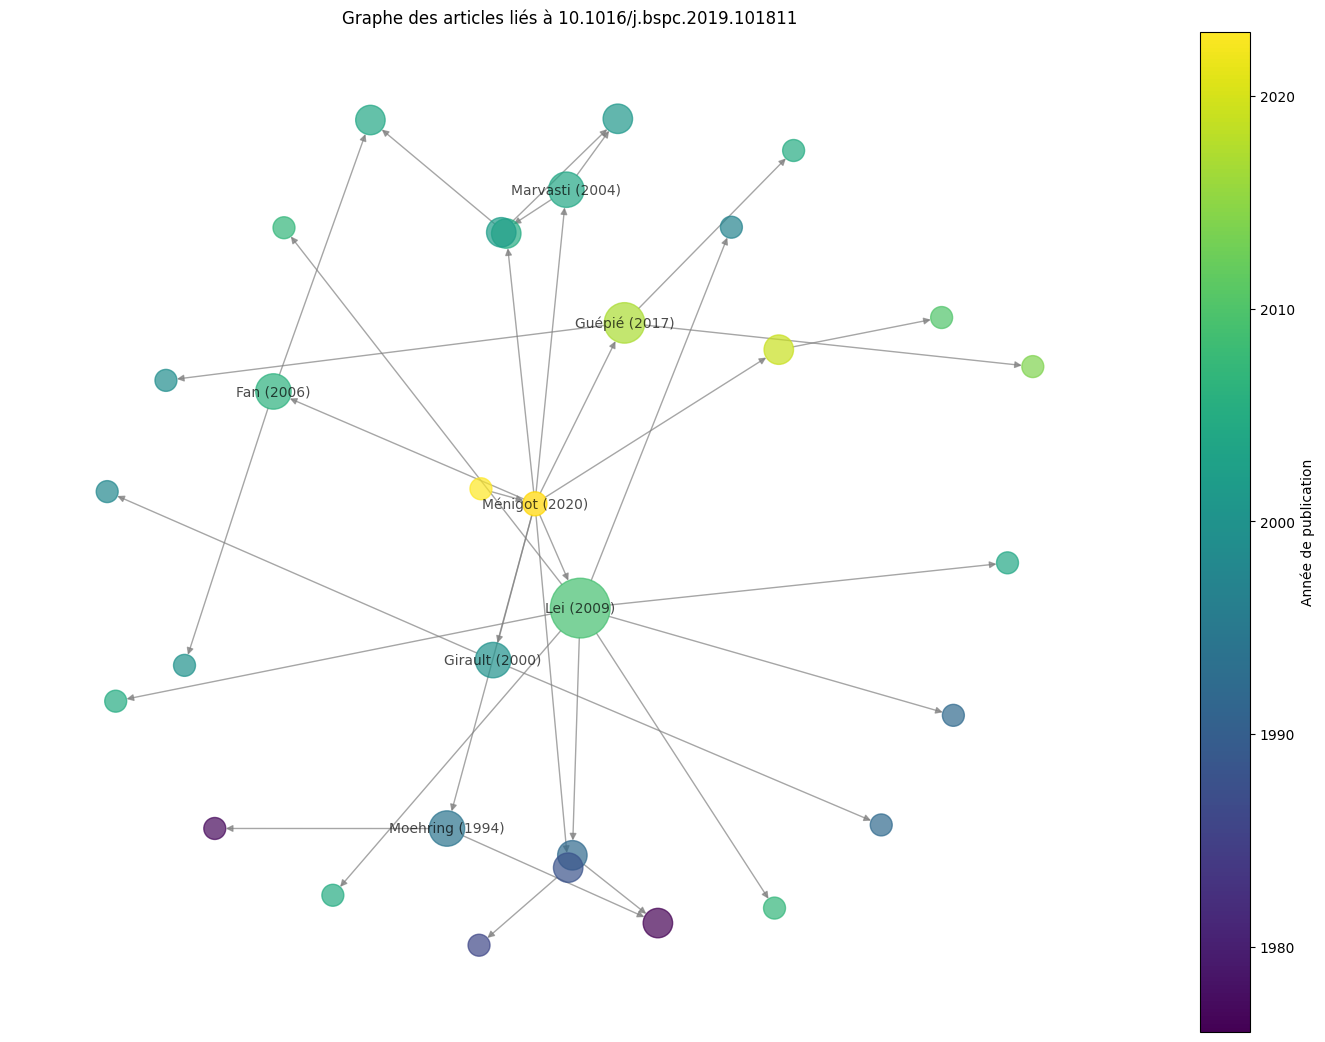

In [ ]:
import os

# Vérifier si un fichier de graphe existe déjà
graph_file = "graph.pkl"
reload_graph = False  # Passez à True si vous souhaitez recharger un graphe existant

if reload_graph and os.path.exists(graph_file):
    # Charger un graphe existant
    graph = load_graph(graph_file)
else:
    # Charger les ISSNs autorisés
    allowed_issns = load_issns_and_titles("issns_and_titles.csv")
    # Traiter l'article et construire le graphe
    graph = process_article(doi, depth=max_depth, min_year=min_year, allowed_issns=allowed_issns)
    # Sauvegarder le graphe
    save_graph(graph, graph_file)
print("Graph OK")

# Visualiser le graphe
visualize_graph(graph, doi, show_labels=True, min_year_graph=min_year)
print("Print Graph OK")

# Sauvegarder le graphe en BibTeX
save_bibtex(graph)
print("Save Data OK")


In [ ]:
import shutil

# Créer une archive ZIP du dossier cache_dir
shutil.make_archive('/content/cache_dir_backup', 'zip', '/content/cache_dir')

import zipfile

# Décompression de l'archive dans le répertoire d'origine
with zipfile.ZipFile('cache_dir_backup.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cache_dir')

